In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
df = pd.read_csv("cardio.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [68]:
df.shape

(70000, 13)

### Univariate analysis
To understand all our variables, at first, we should look at their datatypes. We can do it with info() function:

In [ ]:
df.info()

In [70]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Handling missing values

In [4]:
df.isna().sum()                # no missing values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# cheking dublicates

In [5]:
df.duplicated().sum()               # no duplicate
                                    # here we want to take id column(if you remove it, you can get more dublicates, it has a chance to same age, height people)

0

In [7]:
data = df[["age", "gender", "height", "weight", "ap_hi", "ap_lo"]]
data.head()

,age,gender,height,weight,ap_hi,ap_lo
0,18393,2,168,62.0,110,80
1,20228,1,156,85.0,140,90
2,18857,1,165,64.0,130,70
3,17623,2,169,82.0,150,100
4,17474,1,156,56.0,100,60


<AxesSubplot:>

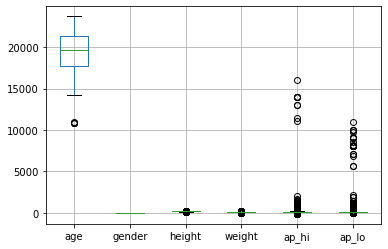

In [8]:
data.boxplot()                # age has small number of outliers, reason is here age in number of days
                              # but ap_hi & ap_lo have large number of outliers

# feature engineering

* Age is measured in days, height is in centimeters
* We can add BMI value to our dataset with small math.

In [9]:
# age convert to years

df["age"] = (df["age"]/365).values.astype(int)                   
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
# dataset has two features for "height" & "weight", we can calculate "body mass index" for both two features
'''
    Formula: weight (kg) / [height (m)]2
    Calculation: [weight (kg) / height (cm) / height (cm)] x 10,000

'''

'''
    If your BMI is less than 18.5, it falls within the underweight range.
    If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range.
    If your BMI is 25.0 to 29.9, it falls within the overweight range.
    If your BMI is 30.0 or higher, it falls within the obese range.
'''

df["bmi"] = df["weight"]/((df["height"]/100)**2)
df.drop(["weight", "height"], axis = 1, inplace = True)
df.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,100,60,1,1,0,0,0,0,23.011177


# Outlier Handling

<AxesSubplot:>

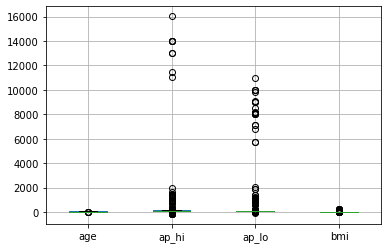

In [11]:
df[["age", "ap_hi", "ap_lo", "bmi"]].boxplot()                # now outlier in ap_hi, ap_lo

In [12]:
# this is hude dataset, therefore I think it is no any harm to drop outliers

In [13]:
data_num = df[["age", "ap_hi", "ap_lo", "bmi"]]

Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

age      10.000000
ap_hi    20.000000
ap_lo    10.000000
bmi       6.347107
dtype: float64


In [14]:
out_rows = ((data_num < (Q1 - 1.5 * IQR)) |(data_num > (Q3 + 1.5 * IQR))).any(axis=1)     # true is outlier rows
out_rows

0        False
1        False
2        False
3        False
4         True
         ...  
69995    False
69996     True
69997     True
69998    False
69999    False
Length: 70000, dtype: bool

In [15]:
~out_rows                           # false for outliers

0         True
1         True
2         True
3         True
4        False
         ...  
69995     True
69996    False
69997    False
69998     True
69999     True
Length: 70000, dtype: bool

In [16]:
df = df[~out_rows]
df.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
5,8,60,1,120,80,2,2,0,0,0,0,29.384676


In [17]:
df.shape

(62745, 12)

<AxesSubplot:>

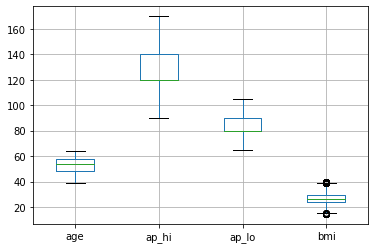

In [18]:
df[["age", "ap_hi", "ap_lo", "bmi"]].boxplot()

### describtion for numaric data

In [19]:
df[["age", "ap_hi", "ap_lo", "bmi"]].describe()

,age,ap_hi,ap_lo,bmi
count,62745.000000,62745.000000,62745.000000,62745.000000
mean,52.882413,126.404319,81.689537,27.034727
std,6.746333,14.296927,7.673500,4.406103
min,39.000000,90.000000,65.000000,14.479500
25%,48.000000,120.000000,80.000000,23.875115
50%,54.000000,120.000000,80.000000,26.222222
75%,58.000000,140.000000,90.000000,29.757585
max,64.000000,170.000000,105.000000,39.736121


### ckeck class inbalance

In [20]:
# There has two category for label data. (hard parsion or not (cardioor not))
# It is more accurate to check check class balance or not

df["cardio"].value_counts()        # classes are balanced

0    31783
1    30962
Name: cardio, dtype: int64

## Descriptive Analysis

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


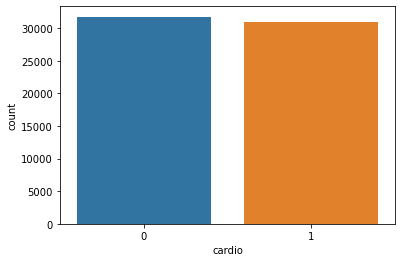

In [21]:
sns.countplot(df["cardio"])
plt.show()

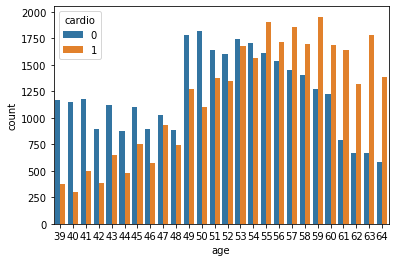

In [22]:
sns.countplot(data = df, x = "age", hue = "cardio")
plt.show()                                            # the risk of becoming ill increases with age.

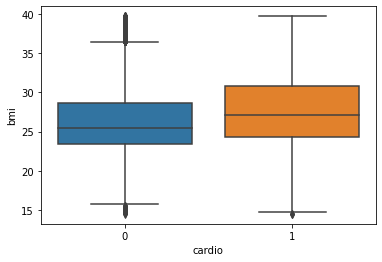

In [23]:
sns.boxplot(data = df, x = "cardio", y = "bmi")           # high bmi people has cardio than low bmi people 
plt.show()

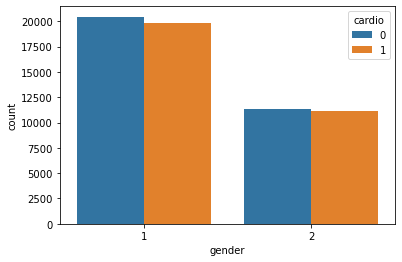

In [24]:
sns.countplot(data = df, x = "gender", hue = "cardio")         # same chance to female & male got cardio
plt.show()

### Check correlation for numeric variable

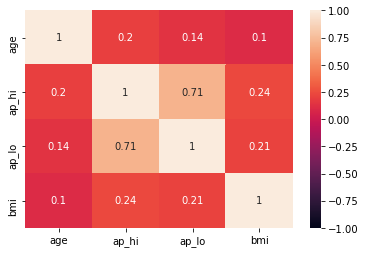

In [25]:
sns.heatmap(df[["age", "ap_hi", "ap_lo", "bmi"]].corr(), annot = True, vmax = 1, vmin = -1)
plt.show()

In [26]:
# there has high correlation among "ap_hi" & "ap_lo"
# but classification doesn't look it too much

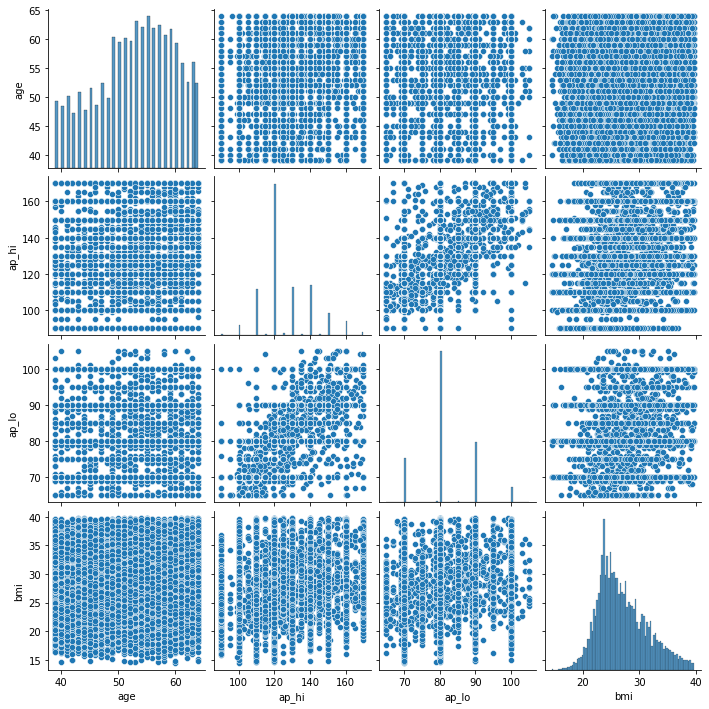

In [27]:
sns.pairplot(df[["age", "ap_hi", "ap_lo", "bmi"]])
plt.show()

In [28]:
data = df[["age", "ap_hi", "ap_lo", "bmi"]]
data["cardio"] = ["yes" if m==1 else "no" for m in df["cardio"]]
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_15440\4203441252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cardio"] = ["yes" if m==1 else "no" for m in df["cardio"]]


,age,ap_hi,ap_lo,bmi,cardio
0,50,110,80,21.967120,no
1,55,140,90,34.927679,yes
2,51,130,70,23.507805,yes
3,48,150,100,28.710479,yes
5,60,120,80,29.384676,no


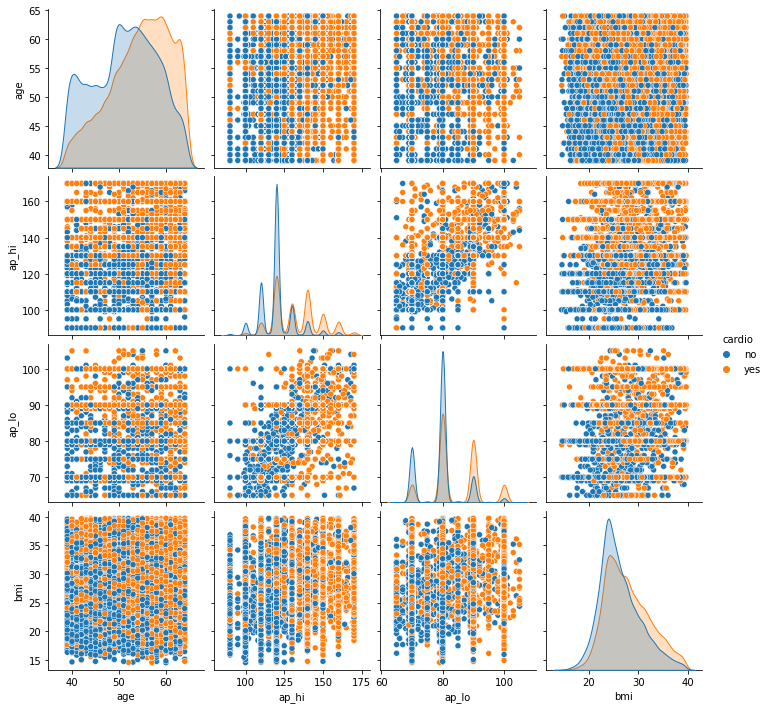

In [29]:
sns.pairplot(data, hue = "cardio")
plt.show()

In [30]:
# if age is increase chance to get corio is high
# it has high chance to cardio in age and bmi in high level

# Machine Learning

In [33]:
df.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
5,8,60,1,120,80,2,2,0,0,0,0,29.384676


In [34]:
df.drop("id", axis = 1, inplace = True)
df = df.reindex(columns = ["age", "ap_hi", "ap_lo", "bmi", "gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"])
df.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,2,1,1,0,0,1,0
1,55,140,90,34.927679,1,3,1,0,0,1,1
2,51,130,70,23.507805,1,3,1,0,0,0,1
3,48,150,100,28.710479,2,1,1,0,0,1,1
5,60,120,80,29.384676,1,2,2,0,0,0,0


In [37]:
# check how many classes have each categorical variables
'''
Features:

    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

'''

df["gender"].value_counts()       # correct (three classes)

1    40289
2    22456
Name: gender, dtype: int64

In [38]:
df["alco"].value_counts()

0    59413
1     3332
Name: alco, dtype: int64

In [41]:
df["cholesterol"].value_counts()

1    47420
2     8257
3     7068
Name: cholesterol, dtype: int64

In [42]:
df["active"].value_counts()

1    50465
0    12280
Name: active, dtype: int64

In [43]:
df["gluc"].value_counts()

1    53596
3     4714
2     4435
Name: gluc, dtype: int64

In [44]:
df["smoke"].value_counts()

0    57184
1     5561
Name: smoke, dtype: int64

In [45]:
df["cardio"].value_counts()

0    31783
1    30962
Name: cardio, dtype: int64

# Label Encoding

In [46]:
# "smoke", "alco", "active", "cardio" have two classes but in store in "0" and 1", those are allread dummy
# but "gender" in "1" & "2", therefore we need to get dummy for "gender", "cholesterol", "gluc" using labelencoding

# LabelEncoder for two classes
# OneHotEncoder for multiple classes
# encode (convert charater classes to numeric ("low", "mediam", "heigh" to 1, 2, 3 is encode))

In [47]:
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
5,60,120,80,29.384676,0,2,2,0,0,0,0


# One Hot Encoding

In [48]:
# "cholesterol", "gluc" have three classes, therefore we must use OneHotEncoder
# if you have character form ("normal", "above normal", "well above normal"), then you can use pd.get_dummies(df)
# but here in numeric type, therefore you must use OneHotEncoder

In [49]:
ohe = OneHotEncoder()        # must use two diamension array

In [50]:
df["cholesterol"].values.reshape(62745, 1).shape

(62745, 1)

In [51]:
ohot_encode1 = ohe.fit_transform(df["cholesterol"].values.reshape(df["cholesterol"].shape[0], 1)).toarray()
ohot_encode1 = ohot_encode1[:, 1:].astype(int)
df_1 = pd.DataFrame(ohot_encode1, columns = ["above normal col", "well above normal col"])
df_1.head()

,above normal col,well above normal col
0,0,0
1,0,1
2,0,1
3,0,0
4,1,0


In [52]:
ohot_encode2 = ohe.fit_transform(df["gluc"].values.reshape(df["gluc"].shape[0], 1)).toarray()
ohot_encode2 = ohot_encode2[:, 1:].astype(int)
df_2 = pd.DataFrame(ohot_encode2, columns = ["above normal gluc", "well above normal gluc"])
df_2.head()

,above normal gluc,well above normal gluc
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


In [53]:
df       # here index is not correct, because some row are drop(outliers drop)

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
5,60,120,80,29.384676,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69993,53,130,90,23.661439,0,1,1,0,0,1,1
69994,57,150,80,29.384757,0,1,1,0,0,1,1
69995,52,120,80,26.927438,1,1,1,1,0,1,0
69998,61,135,80,27.099251,0,1,2,0,0,0,1


In [54]:
df.reset_index(inplace = True)
df

,index,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,110,80,21.967120,1,1,1,0,0,1,0
1,1,55,140,90,34.927679,0,3,1,0,0,1,1
2,2,51,130,70,23.507805,0,3,1,0,0,0,1
3,3,48,150,100,28.710479,1,1,1,0,0,1,1
4,5,60,120,80,29.384676,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62740,69993,53,130,90,23.661439,0,1,1,0,0,1,1
62741,69994,57,150,80,29.384757,0,1,1,0,0,1,1
62742,69995,52,120,80,26.927438,1,1,1,1,0,1,0
62743,69998,61,135,80,27.099251,0,1,2,0,0,0,1


In [55]:
x = pd.concat([df.iloc[:, :10], df_1, df_2], axis = 1)
x.head()

,index,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,above normal col,well above normal col,above normal gluc,well above normal gluc
0,0,50,110,80,21.967120,1,1,1,0,0,0,0,0,0
1,1,55,140,90,34.927679,0,3,1,0,0,0,1,0,0
2,2,51,130,70,23.507805,0,3,1,0,0,0,1,0,0
3,3,48,150,100,28.710479,1,1,1,0,0,0,0,0,0
4,5,60,120,80,29.384676,0,2,2,0,0,1,0,1,0


In [56]:
x.drop(["index", "cholesterol", "gluc"], axis = 1,inplace = True)
x.head()

,age,ap_hi,ap_lo,bmi,gender,smoke,alco,above normal col,well above normal col,above normal gluc,well above normal gluc
0,50,110,80,21.967120,1,0,0,0,0,0,0
1,55,140,90,34.927679,0,0,0,0,1,0,0
2,51,130,70,23.507805,0,0,0,0,1,0,0
3,48,150,100,28.710479,1,0,0,0,0,0,0
4,60,120,80,29.384676,0,0,0,1,0,1,0


In [57]:
x = x.values
y = df.iloc[:, -1].values

# Standardizing Neumerical Features

In [58]:
sc = StandardScaler()
x[:, :4] = sc.fit_transform(x[:, :4])
x[:, :4]

array([[-0.42725964, -1.14741093, -0.2201799 , -1.15014289],
       [ 0.31388961,  0.95095888,  1.08301675,  1.79138238],
       [-0.27902979,  0.25150228, -1.52337654, -0.80046937],
       ...,
       [-0.13079994, -0.44795433, -0.2201799 , -0.02435046],
       [ 1.20326872,  0.60123058, -0.2201799 ,  0.01464426],
       [ 0.46211946, -0.44795433, -0.2201799 , -0.48143443]])

# Train Test Splitting

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Model building

In [60]:
model1=KNeighborsClassifier(n_neighbors=50)
model2=LogisticRegression()
model3=SVC(kernel="rbf",C=1)
model4=RandomForestClassifier(n_estimators=500)

T1=("knn",model1)
T2=("lgr",model2)
T3=("svm",model3)
T4=("rf",model4)

model=VotingClassifier(estimators=[T1,T2,T3,T4],voting="hard")

In [61]:
model.fit(x_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=50)),
                             ('lgr', LogisticRegression()), ('svm', SVC(C=1)),
                             ('rf', RandomForestClassifier(n_estimators=500))])

In [62]:
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7231651924456132

In [63]:
confusion_matrix(y_test,y_pred)

array([[5169, 1246],
       [2228, 3906]], dtype=int64)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6415
           1       0.76      0.64      0.69      6134

    accuracy                           0.72     12549
   macro avg       0.73      0.72      0.72     12549
weighted avg       0.73      0.72      0.72     12549

